# 16 - Logic of Hypothesis Testing

**The 4-Step Logic:**

1. **Assume null hypothesis is true** (nothing is happening)
2. **Ask: "How likely is this data?"** (if null were true)
3. **If very unlikely:** Reject the null (something IS happening)
4. **If not unlikely:** Stick with null (not enough evidence)

**Key Insight:** We start by assuming the opposite of what we want to prove, then see if the data contradicts that assumption.

**Think of it like:** Innocent until proven guilty - we assume no effect until evidence proves otherwise.

## Simple Example: Teacher Checking Homework

A teacher assumes ALL students did their homework. Then checks to see if evidence contradicts that.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61392/1472776990.py:140: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61392/1472776990.py:140: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61392/1472776990.py:140: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_61392/1472776990.py:140: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.1

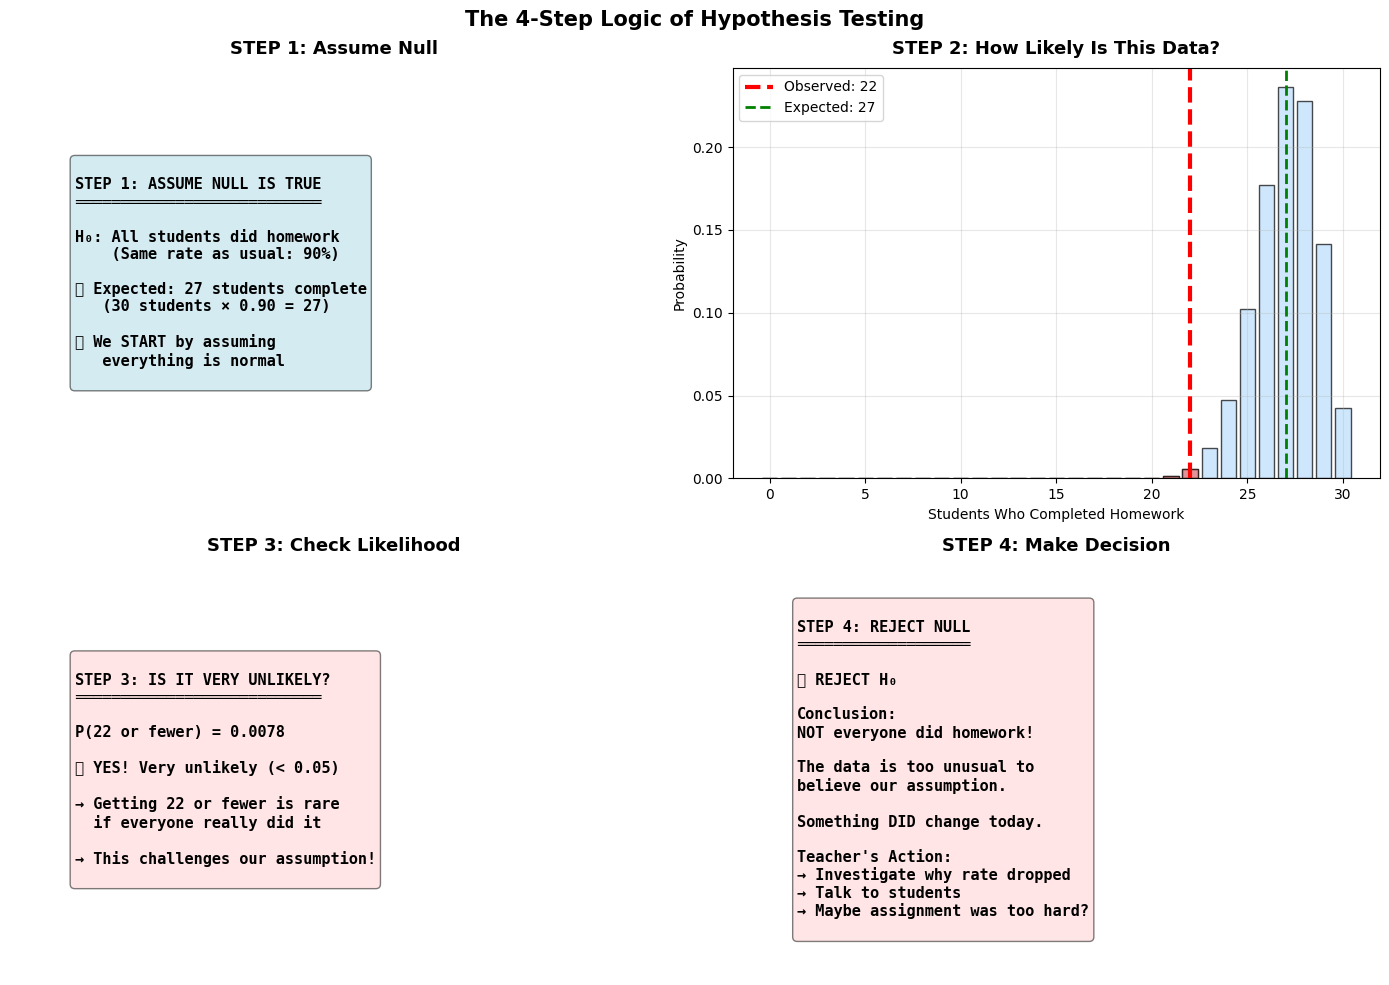


📚 TEACHER HOMEWORK CHECK - 4 STEP LOGIC

🎯 STEP 1: Assume null is true
   H₀: All students did homework (rate = 90%)
   Expected: 27 students complete

❓ STEP 2: How likely is this data?
   Observed: 22 students completed (73.3%)
   P-value: 0.0078

🎲 STEP 3: Is it very unlikely?
   YES! P-value (0.0078) < 0.05
   → This is surprisingly low if rate is really 90%

📊 STEP 4: Make decision
   ❌ REJECT H₀: Something changed!
   → Not everyone did homework
   → Teacher should investigate


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teacher has 30 students
# Normally 90% do homework (historical rate)
n_students = 30
historical_rate = 0.90

# Today: Only 22 students did homework
observed_completed = 22
observed_rate = observed_completed / n_students

# The 4-step process visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# STEP 1: Assume null is true
ax1 = axes[0, 0]
ax1.axis('off')
step1_text = """
STEP 1: ASSUME NULL IS TRUE
═══════════════════════════

H₀: All students did homework
    (Same rate as usual: 90%)

📚 Expected: 27 students complete
   (30 students × 0.90 = 27)

🎯 We START by assuming
   everything is normal
"""
ax1.text(0.1, 0.5, step1_text, fontsize=11, family='monospace',
        verticalalignment='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
ax1.set_title('STEP 1: Assume Null', fontsize=13, fontweight='bold', pad=10)

# STEP 2: How likely is this data?
ax2 = axes[0, 1]
from scipy import stats

# Distribution under null
x = np.arange(0, n_students + 1)
pmf = stats.binom.pmf(x, n_students, historical_rate)

ax2.bar(x, pmf, color='#BBDEFB', alpha=0.7, edgecolor='black', width=0.8)
ax2.axvline(observed_completed, color='red', linestyle='--', linewidth=3,
           label=f'Observed: {observed_completed}')
ax2.axvline(n_students * historical_rate, color='green', linestyle='--', linewidth=2,
           label=f'Expected: {n_students * historical_rate:.0f}')

# Shade unlikely region
unlikely_x = x[x <= observed_completed]
unlikely_pmf = stats.binom.pmf(unlikely_x, n_students, historical_rate)
ax2.bar(unlikely_x, unlikely_pmf, color='#F44336', alpha=0.5, edgecolor='black', width=0.8)

ax2.set_xlabel('Students Who Completed Homework', fontsize=10)
ax2.set_ylabel('Probability', fontsize=10)
ax2.set_title('STEP 2: How Likely Is This Data?', fontsize=13, fontweight='bold', pad=10)
ax2.legend()
ax2.grid(alpha=0.3)

# Calculate p-value
p_value = stats.binom.cdf(observed_completed, n_students, historical_rate)

# STEP 3: Decision based on likelihood
ax3 = axes[1, 0]
ax3.axis('off')
step3_text = f"""
STEP 3: IS IT VERY UNLIKELY?
═══════════════════════════

P(22 or fewer) = {p_value:.4f}

{'🔴 YES! Very unlikely (< 0.05)' if p_value < 0.05 else '🟢 NO! Not that unusual (≥ 0.05)'}

{'→ Getting 22 or fewer is rare' if p_value < 0.05 else '→ Getting 22 could happen by chance'}
{'  if everyone really did it' if p_value < 0.05 else '  even if rate is still 90%'}

{'→ This challenges our assumption!' if p_value < 0.05 else '→ Our assumption still holds up'}
"""
color = '#ffcccc' if p_value < 0.05 else '#ccffcc'
ax3.text(0.1, 0.5, step3_text, fontsize=11, family='monospace',
        verticalalignment='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))
ax3.set_title('STEP 3: Check Likelihood', fontsize=13, fontweight='bold', pad=10)

# STEP 4: Conclusion
ax4 = axes[1, 1]
ax4.axis('off')

if p_value < 0.05:
    step4_text = """
STEP 4: REJECT NULL
═══════════════════

❌ REJECT H₀

Conclusion:
NOT everyone did homework!

The data is too unusual to
believe our assumption.

Something DID change today.

Teacher's Action:
→ Investigate why rate dropped
→ Talk to students
→ Maybe assignment was too hard?
"""
    color = '#ffcccc'
else:
    step4_text = """
STEP 4: STICK WITH NULL
══════════════════════

✅ FAIL TO REJECT H₀

Conclusion:
No strong evidence of change

The data is not unusual enough
to reject our assumption.

Rate might still be ~90%

Teacher's Action:
→ Keep monitoring
→ Need more days of data
→ Probably just random variation
"""
    color = '#ccffcc'

ax4.text(0.1, 0.5, step4_text, fontsize=11, family='monospace',
        verticalalignment='center', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor=color, alpha=0.5))
ax4.set_title('STEP 4: Make Decision', fontsize=13, fontweight='bold', pad=10)

plt.suptitle('The 4-Step Logic of Hypothesis Testing', fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📚 TEACHER HOMEWORK CHECK - 4 STEP LOGIC")
print("="*60)

print("\n🎯 STEP 1: Assume null is true")
print(f"   H₀: All students did homework (rate = 90%)")
print(f"   Expected: {n_students * historical_rate:.0f} students complete")

print("\n❓ STEP 2: How likely is this data?")
print(f"   Observed: {observed_completed} students completed ({observed_rate:.1%})")
print(f"   P-value: {p_value:.4f}")

print("\n🎲 STEP 3: Is it very unlikely?")
if p_value < 0.05:
    print(f"   YES! P-value ({p_value:.4f}) < 0.05")
    print(f"   → This is surprisingly low if rate is really 90%")
else:
    print(f"   NO. P-value ({p_value:.4f}) ≥ 0.05")
    print(f"   → This could happen by chance")

print("\n📊 STEP 4: Make decision")
if p_value < 0.05:
    print("   ❌ REJECT H₀: Something changed!")
    print("   → Not everyone did homework")
    print("   → Teacher should investigate")
else:
    print("   ✅ FAIL TO REJECT H₀: No strong evidence")
    print("   → Could be normal variation")
    print("   → Keep monitoring")

## Real-World Example: Website A/B Test

Testing a new website design. Does it actually improve conversion rate, or is the difference just random?

/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/sturner/.pyenv/versions/3.12.7/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


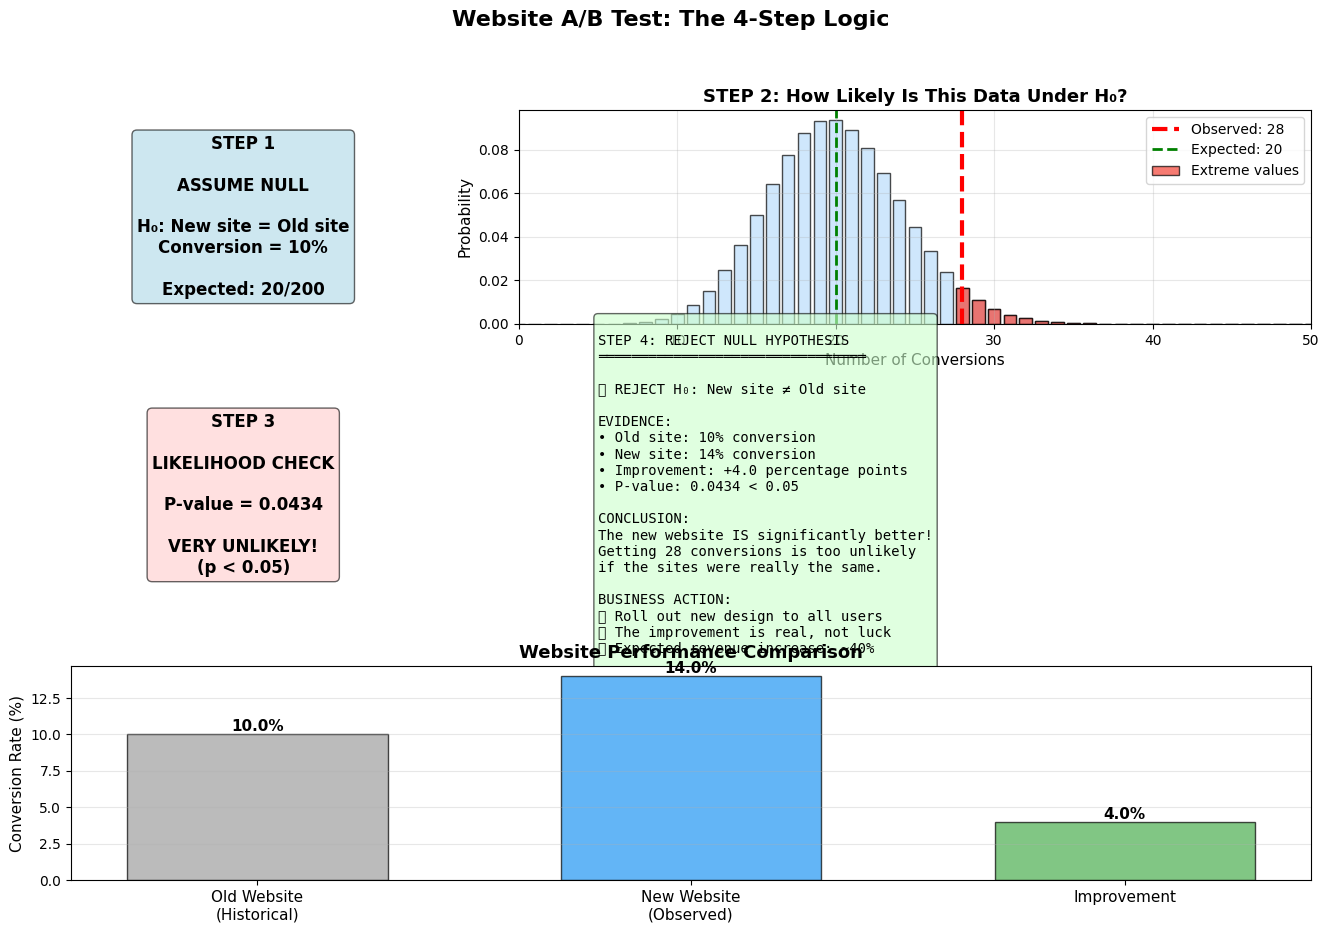


🌐 WEBSITE A/B TEST - 4 STEP HYPOTHESIS TESTING LOGIC

──────────────────────────────────────────────────────────────────────
STEP 1: ASSUME NULL IS TRUE
──────────────────────────────────────────────────────────────────────
H₀: New website = Old website (conversion rate = 10%)
Expected: 20 conversions out of 200 visitors

──────────────────────────────────────────────────────────────────────
STEP 2: HOW LIKELY IS THIS DATA?
──────────────────────────────────────────────────────────────────────
Observed: 28 conversions (14.0%)
Difference from expected: +8 conversions
P(getting 28 or more) = 0.0434

──────────────────────────────────────────────────────────────────────
STEP 3: IS IT VERY UNLIKELY?
──────────────────────────────────────────────────────────────────────
✓ YES! p-value (0.0434) < 0.05 (significance level)
→ Getting 28 conversions is very surprising
→ If sites were same, this would be rare

──────────────────────────────────────────────────────────────────────
STEP 4: MAKE D

In [2]:
# Website A/B test scenario
n_visitors = 200
old_conversion_rate = 0.10  # Historical: 10% convert

# New website: 28 conversions
new_conversions = 28
new_rate = new_conversions / n_visitors

# Expected under null
expected_conversions = n_visitors * old_conversion_rate

# The 4-step process for website test
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# STEP 1: Assume null
ax1 = fig.add_subplot(gs[0, 0])
ax1.axis('off')
ax1.text(0.5, 0.5, 
         "STEP 1\n\nASSUME NULL\n\n" +
         f"H₀: New site = Old site\n" +
         f"Conversion = {old_conversion_rate:.0%}\n\n" +
         f"Expected: {expected_conversions:.0f}/{n_visitors}",
         ha='center', va='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.6))

# STEP 2: Visualize data
ax2 = fig.add_subplot(gs[0, 1:])
x_web = np.arange(0, n_visitors + 1)
pmf_web = stats.binom.pmf(x_web, n_visitors, old_conversion_rate)

ax2.bar(x_web, pmf_web, color='#BBDEFB', alpha=0.7, edgecolor='black', width=0.8)

# Highlight extreme values
extreme_x = x_web[x_web >= new_conversions]
extreme_pmf = stats.binom.pmf(extreme_x, n_visitors, old_conversion_rate)
ax2.bar(extreme_x, extreme_pmf, color='#F44336', alpha=0.7, edgecolor='black', width=0.8,
        label='Extreme values')

ax2.axvline(new_conversions, color='red', linestyle='--', linewidth=3,
           label=f'Observed: {new_conversions}')
ax2.axvline(expected_conversions, color='green', linestyle='--', linewidth=2,
           label=f'Expected: {expected_conversions:.0f}')
ax2.set_xlabel('Number of Conversions', fontsize=11)
ax2.set_ylabel('Probability', fontsize=11)
ax2.set_title('STEP 2: How Likely Is This Data Under H₀?', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xlim(0, 50)

# Calculate p-value
p_value_web = 1 - stats.binom.cdf(new_conversions - 1, n_visitors, old_conversion_rate)

# STEP 3: Check likelihood
ax3 = fig.add_subplot(gs[1, 0])
ax3.axis('off')
step3_color = '#ffcccc' if p_value_web < 0.05 else '#ccffcc'
step3_decision = "VERY UNLIKELY!" if p_value_web < 0.05 else "Not that unusual"
ax3.text(0.5, 0.5,
         f"STEP 3\n\nLIKELIHOOD CHECK\n\n" +
         f"P-value = {p_value_web:.4f}\n\n" +
         f"{step3_decision}\n" +
         f"{'(p < 0.05)' if p_value_web < 0.05 else '(p ≥ 0.05)'}",
         ha='center', va='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor=step3_color, alpha=0.6))

# STEP 4: Make decision
ax4 = fig.add_subplot(gs[1, 1:])
ax4.axis('off')

if p_value_web < 0.05:
    decision_text = f"""
STEP 4: REJECT NULL HYPOTHESIS
════════════════════════════════

❌ REJECT H₀: New site ≠ Old site

EVIDENCE:
• Old site: {old_conversion_rate:.0%} conversion
• New site: {new_rate:.0%} conversion  
• Improvement: +{(new_rate - old_conversion_rate)*100:.1f} percentage points
• P-value: {p_value_web:.4f} < 0.05

CONCLUSION:
The new website IS significantly better!
Getting {new_conversions} conversions is too unlikely
if the sites were really the same.

BUSINESS ACTION:
✅ Roll out new design to all users
✅ The improvement is real, not luck
✅ Expected revenue increase: ~{((new_rate/old_conversion_rate - 1)*100):.0f}%
"""
    decision_color = '#ccffcc'
else:
    decision_text = f"""
STEP 4: FAIL TO REJECT NULL
═══════════════════════════

✅ FAIL TO REJECT H₀: No strong evidence

EVIDENCE:
• Old site: {old_conversion_rate:.0%} conversion
• New site: {new_rate:.0%} conversion
• Difference: +{(new_rate - old_conversion_rate)*100:.1f} percentage points  
• P-value: {p_value_web:.4f} ≥ 0.05

CONCLUSION:
Not enough evidence new site is better.
Getting {new_conversions} conversions could happen
by chance even if sites are the same.

BUSINESS ACTION:
⏸️  Don't roll out yet
📊 Collect more data (larger test)
🔍 Difference might be random variation
"""
    decision_color = '#ffffcc'

ax4.text(0.1, 0.5, decision_text, fontsize=10, family='monospace',
        verticalalignment='center',
        bbox=dict(boxstyle='round', facecolor=decision_color, alpha=0.6))

# Comparison chart
ax5 = fig.add_subplot(gs[2, :])
scenarios = ['Old Website\n(Historical)', 'New Website\n(Observed)', 'Improvement']
rates = [old_conversion_rate * 100, new_rate * 100, (new_rate - old_conversion_rate) * 100]
colors = ['#9E9E9E', '#2196F3', '#4CAF50']

bars = ax5.bar(range(3), rates, color=colors, alpha=0.7, edgecolor='black', width=0.6)
ax5.set_xticks(range(3))
ax5.set_xticklabels(scenarios, fontsize=11)
ax5.set_ylabel('Conversion Rate (%)', fontsize=11)
ax5.set_title('Website Performance Comparison', fontsize=13, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, rates):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.suptitle('Website A/B Test: The 4-Step Logic', fontsize=16, fontweight='bold')
plt.show()

print("\n" + "="*70)
print("🌐 WEBSITE A/B TEST - 4 STEP HYPOTHESIS TESTING LOGIC")
print("="*70)

print("\n" + "─"*70)
print("STEP 1: ASSUME NULL IS TRUE")
print("─"*70)
print(f"H₀: New website = Old website (conversion rate = {old_conversion_rate:.0%})")
print(f"Expected: {expected_conversions:.0f} conversions out of {n_visitors} visitors")

print("\n" + "─"*70)
print("STEP 2: HOW LIKELY IS THIS DATA?")
print("─"*70)
print(f"Observed: {new_conversions} conversions ({new_rate:.1%})")
print(f"Difference from expected: +{new_conversions - expected_conversions:.0f} conversions")
print(f"P(getting {new_conversions} or more) = {p_value_web:.4f}")

print("\n" + "─"*70)
print("STEP 3: IS IT VERY UNLIKELY?")
print("─"*70)
if p_value_web < 0.05:
    print(f"✓ YES! p-value ({p_value_web:.4f}) < 0.05 (significance level)")
    print(f"→ Getting {new_conversions} conversions is very surprising")
    print(f"→ If sites were same, this would be rare")
else:
    print(f"✗ NO. p-value ({p_value_web:.4f}) ≥ 0.05 (significance level)")
    print(f"→ Getting {new_conversions} conversions is not that unusual")
    print(f"→ Could happen by chance even if sites are same")

print("\n" + "─"*70)
print("STEP 4: MAKE DECISION")
print("─"*70)
if p_value_web < 0.05:
    print("❌ REJECT H₀")
    print(f"\nConclusion: New website IS significantly better!")
    print(f"   • Conversion rate improved from {old_conversion_rate:.0%} → {new_rate:.0%}")
    print(f"   • Relative improvement: {((new_rate/old_conversion_rate - 1)*100):.1f}%")
    print(f"   • Evidence is strong enough to trust the difference")
    print(f"\n💼 Business Decision: Roll out new website to all users")
else:
    print("✅ FAIL TO REJECT H₀")
    print(f"\nConclusion: Not enough evidence new website is better")
    print(f"   • Observed rate: {new_rate:.0%} vs Expected: {old_conversion_rate:.0%}")
    print(f"   • Difference could be random chance")
    print(f"   • Need more data to be confident")
    print(f"\n💼 Business Decision: Continue testing with larger sample")

print("\n" + "="*70)

## Summary: The 4-Step Logic Flow

### The Process

```
STEP 1: ASSUME NULL IS TRUE
   ↓
   Start by assuming "nothing is happening"
   (Like assuming innocent until proven guilty)

STEP 2: HOW LIKELY IS THIS DATA?
   ↓
   Calculate: If null were true, how surprising is what we saw?
   (This is the p-value)

STEP 3: IS IT VERY UNLIKELY?
   ↓
   Compare p-value to threshold (usually 0.05)
   
   If p < 0.05: Very unlikely → Go to REJECT
   If p ≥ 0.05: Not unusual → Go to STICK WITH NULL

STEP 4: MAKE DECISION
   ↓
   REJECT NULL: Evidence shows something IS happening
   OR
   FAIL TO REJECT: Not enough evidence to say something changed
```

### Key Insights

1. **We start by assuming the opposite** of what we want to prove
2. **Burden of proof is on showing change** - data must be surprising enough
3. **We never "accept" or "prove" anything** - just show evidence
4. **"Fail to reject" ≠ "Accept null"** - just means not enough evidence yet

### Real-World Analogy

**Like a courtroom:**
- Start assuming defendant is innocent (null hypothesis)
- Look at evidence (data)
- Ask: "Is this evidence very unlikely if they're innocent?"
- If yes → convict (reject null)
- If no → not guilty verdict (fail to reject null)

### Common Applications

| Business Context | H₀ (Null) | Look For |
|------------------|-----------|----------|
| **A/B Testing** | New = Old | p < 0.05 to use new version |
| **Quality Control** | Process OK | p < 0.05 signals problem |
| **Medical Trials** | Drug = Placebo | p < 0.05 shows drug works |
| **Marketing Campaigns** | No effect | p < 0.05 proves ROI |

### Remember

**The logic always follows the same 4 steps:**
1. Assume null is true
2. Calculate how likely data is under null
3. Check if it's very unlikely (p < 0.05)
4. Reject null if unlikely, otherwise stick with it

**This framework applies to ALL hypothesis tests!**